In [96]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# 파일 불러오기

In [97]:
df = pd.read_csv("C:\\AI\\abalone.csv") # 컬럼이 없을때는 header = None 붙이기
df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [98]:
# 컬럼을 붙이고 싶다면 
# df.columns = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety','output'] 이런식

# 불필요한 컬럼 제거 
df.drop(columns=['id'], inplace=True)

# 문자형 데이터를 숫자로 변환 (엔코딩)
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])  

# 결측치 확인

In [99]:
# 결측치 확인
print(df.isnull().sum())

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64


In [100]:
# 결측치를 평균값으로 채우기 (있을때만)
# df.fillna(df.mean(), inplace=True) 

# 특성과 라벨 분리 
X = df.drop(columns=['Rings'])
y = df['Rings']

# 정규화 및 데이터 분할

In [101]:
# 정규화 
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 훈련/테스트 데이터 분할 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# shape를 통해 제대로 분리 됐는지 확인
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3341, 8) (836, 8) (3341,) (836,)


# LinearRegression

In [102]:
# LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)

print("LR")
print('평균제곱근오차', mean_squared_error(ly_preds, y_test))

LR
평균제곱근오차 5.104186010193345


# DecisionTreeRegression

In [103]:
# DecisionTreeRegression
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
dy_preds = model.predict(X_test)

print("DT")
print('평균제곱근오차', mean_squared_error(dy_preds, y_test))

DT
평균제곱근오차 8.870813397129186


# RandomForestRegression

In [104]:
# RandomForestRegression
model = RandomForestRegressor()
model.fit(X_train, y_train)
ry_preds = model.predict(X_test)

print("RF")
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

RF
평균제곱근오차 4.684702870813397


# SVR

In [105]:
# SVR
model = SVR(kernel='linear')
model.fit(X_train, y_train)
sy_preds = model.predict(X_test)

print("SVR")
print('평균제곱근오차', mean_squared_error(sy_preds, y_test))

SVR
평균제곱근오차 5.319447560614667


# 상관관계 분석

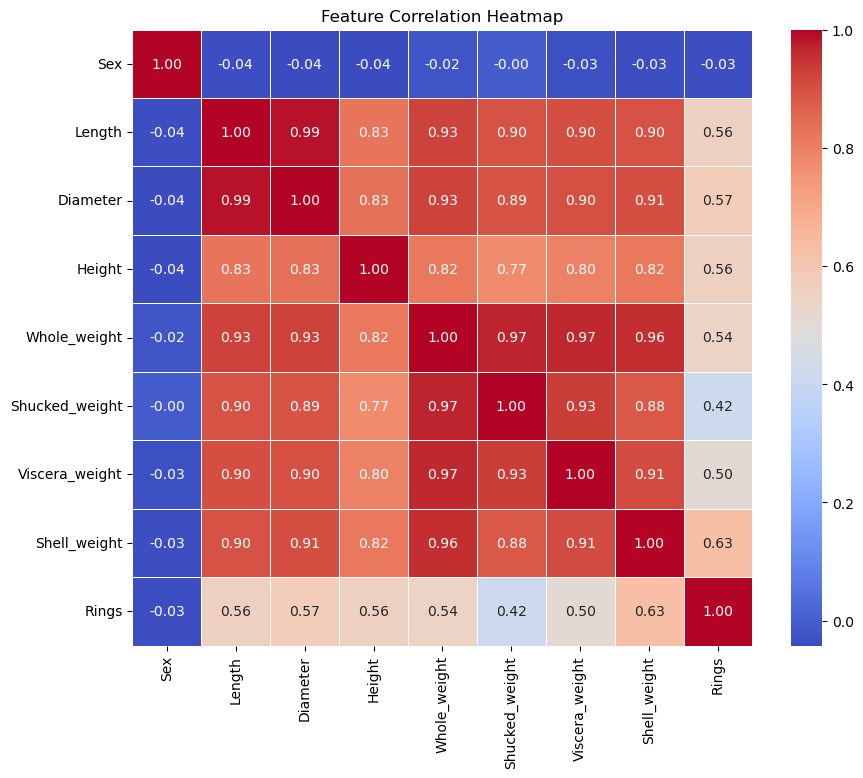

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

# 숫자형 변수만 선택
numeric_df = df.select_dtypes(include=['number'])

# 상관관계 분석 (Heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# 산점도

In [119]:
# 상관관계에서 Rings와 가장 연관이 있는건 shell_weight

model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)

print('평균제곱근오차', mean_squared_error(ly_preds, y_test))

평균제곱근오차 4.752982651870826


In [120]:
import pandas as pd

# X를 다시 DataFrame으로 변환
columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
           'shucked_weight', 'Viscera_weight', 'Shell_weight']  # 컬럼명 추가

X = pd.DataFrame(X, columns=columns)

# train_test_split 실행 (DataFrame 유지)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=12
)

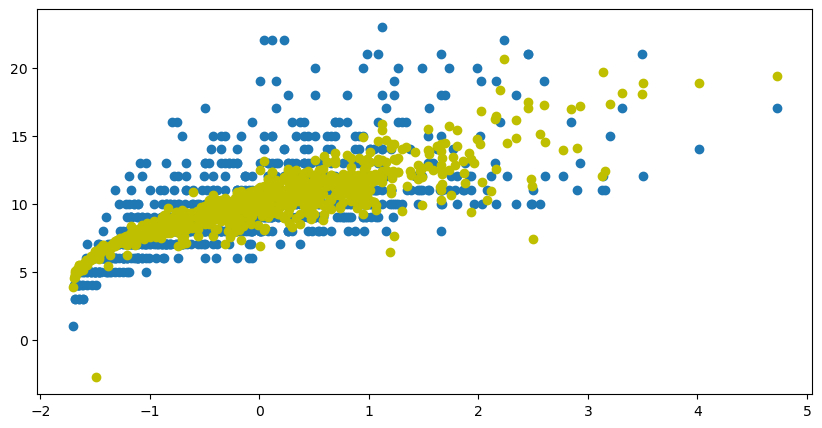

In [121]:
# 예측값과 실제 값 차이를 산접도로 표시, 노란색 예측

plt.figure(figsize=(10,5))
plt.scatter(X_test['Shell_weight'], y_test, label='y_test')
plt.scatter(X_test['Shell_weight'], ly_preds, c='y', label='ly_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()    

In [122]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(dy_preds, y_test))

평균제곱근오차 8.75598086124402


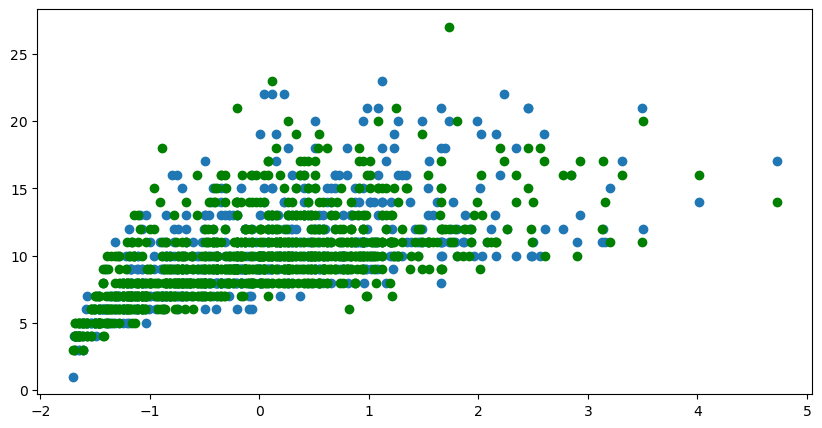

In [123]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Shell_weight'], y_test, label='y_test')
plt.scatter(X_test['Shell_weight'], dy_preds, c='g', label='dy_preds')
plt.show()    

In [124]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 4.474334928229665


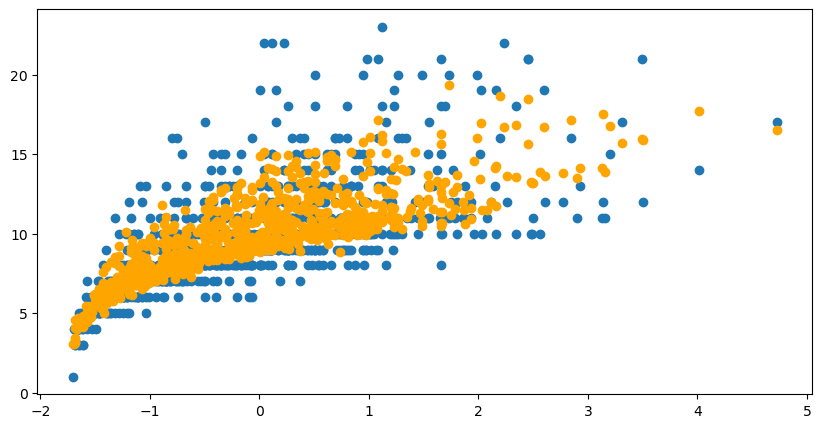

In [125]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Shell_weight'], y_test, label='y_test')
plt.scatter(X_test['Shell_weight'], ry_preds, c='orange', label='ry_preds')

plt.show()  

In [126]:
from sklearn.svm import SVR

model = SVR(kernel='linear')
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 5.075957913189063


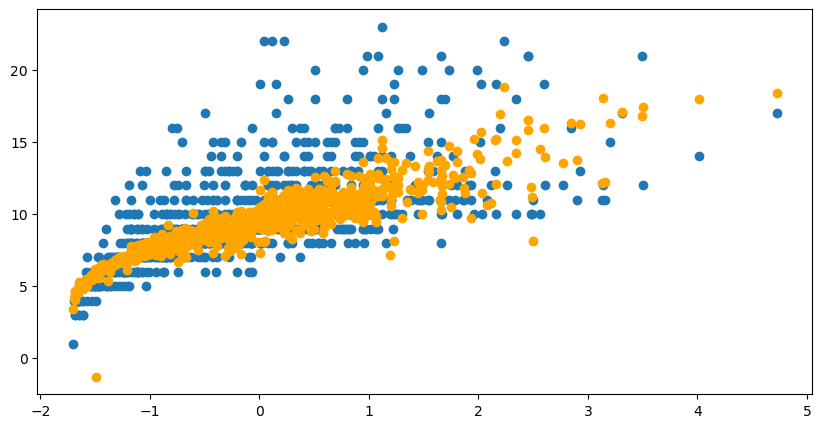

In [127]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Shell_weight'], y_test, label='y_test')
plt.scatter(X_test['Shell_weight'], ry_preds, c='orange', label='ry_preds')

plt.show()  